<b><font size="7">Proyek Analisis data : Air Quality</font><b>

- Nama  : Fikri Haikal Fadzillah
- Email : poetrabunghsoe077@gmail.com
- Id dicoding : mr_katze

<b><font size="5">Pertanyaan</font><b>

- Bagaimana trend perubahan polutan dari 2013 hingga 2017?
- Bagaimana trend perkembangan kualitas setiap polutan tiap tahunnya?
- Stasiun dengan tingkat pollutan tertinggi dan terendah?
- Bagaimana korelasi tingkat polusi dengan cuaca di seluruh stasiun?

<b><font size="5">Library</font><b>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b><font size="6">1. Data Wrangling</font><b>

<b><font size="5">Gathering Data</font><b>

In [40]:
station = ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 
        'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 
        'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv',
        'PRSA_Data_Tiantan_20130301-20170228.csv','PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

station_data = []

for csv_file in station:
    file_path = f'D:/Project/Python/Data_Analisis/air_quality/{csv_file}'
    df = pd.read_csv(file_path)
    station_data.append(df)

combine_df = pd.concat(station_data, ignore_index=True)

print(combine_df.head())
        

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


<b><font size="5">Assessing Data</font><b>

In [41]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [42]:
combine_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [43]:
print("Duplikasi : ", combine_df.duplicated().sum())

Duplikasi :  0


In [44]:
combine_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


<b><font size="5">Cleaning Data</font><b>

In [45]:
# Proses Cleaning Data dengan type dari data
column_fill = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
numeric_columns = combine_df[column_fill].select_dtypes(include=['float64']).columns
combine_df.loc[:, numeric_columns] = combine_df.loc[:, numeric_columns].fillna(combine_df[numeric_columns].mean())

missing_values = combine_df[numeric_columns].isna().sum()

# Cleaning Data Pada Column WD
combine_df['wd'] = combine_df['wd'].fillna(combine_df['wd'].mode()[0])
combine_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

- Terdapat 12 data yang memiliki missing
- Data missing value dilakukan dengan proses imputation
- Tidak terdapat data duplikat

<b><font size="6">Exploratory Data</font><b>

In [46]:
combine_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,10.469162,13.787240,0.820624,NaN,1.245914,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


<font size="4">Konsetrasi Polutan dari berbagai stasiun</font>

In [47]:
# mencari nilai rata2 & max dari pollutan berdasarkan stasiun
air_pollution= combine_df.groupby(by='station').agg({
    'PM2.5': ['mean','max'],
    'PM10' : ['mean','max'],
    'SO2': ['mean','max'],
    'NO2': ['mean','max'],
    'CO': ['mean','max'],
    'O3': ['mean','max']
})
print(air_pollution)

                   PM2.5               PM10               SO2         \
                    mean    max        mean    max       mean    max   
station                                                                
Aotizhongxin   82.694993  898.0  109.948633  984.0  17.334701  341.0   
Changping      71.291647  882.0   94.822936  999.0  14.974522  310.0   
Dingling       66.296172  881.0   84.130040  905.0  11.834616  156.0   
Dongsi         86.057386  737.0  110.246308  955.0  18.480049  300.0   
Guanyuan       82.878210  680.0  108.969217  999.0  17.567148  293.0   
Gucheng        83.777314  770.0  118.707038  994.0  15.372880  500.0   
Huairou        69.902696  762.0   91.773421  993.0  12.225223  315.0   
Nongzhanguan   84.748126  844.0  108.936027  995.0  18.652884  257.0   
Shunyi         79.499461  941.0   98.828697  999.0  13.655526  239.0   
Tiantan        82.119124  821.0  106.333689  988.0  14.414269  273.0   
Wanliu         83.335700  957.0  110.417138  951.0  18.334736  2

- Stasiun seperti Aotizhongxin, Dongsi, Gucheng, dan Wanshouxigong secara konsisten menunjukkan tingkat polusi yang lebih tinggi di berbagai polutan, khususnya PM2.5, CO, dan NO2
- Pada Stasiun Dongsi memiliki tingkat O3 sangat tinggi diikuti dengan Tiantan dan Dangling.
- Gucheng menjadi polusi dengan SO2 tertinggi.

<font size="4">Nilai Cuaca pada masing-masing Stasiun</font>

In [48]:
# Nilai rata2, max, min dari cuaca berdasarkan stasiun
weather_stat = combine_df.groupby(by='station').agg({
    'TEMP' : ['mean','max','min'],
    'PRES' : ['mean','max','min'],	
    'DEWP' : ['mean','max','min'],
    'RAIN' : ['mean','max','min'],
    'WSPM' : ['mean','max','min']   
})
print(weather_stat)

                    TEMP                     PRES                     DEWP  \
                    mean   max   min         mean     max    min      mean   
station                                                                      
Aotizhongxin   13.584581  40.5 -16.8  1011.846292  1042.0  985.9  3.122702   
Changping      13.685889  41.4 -16.6  1007.764537  1036.5  982.4  1.506985   
Dingling       13.685889  41.4 -16.6  1007.764537  1036.5  982.4  1.506985   
Dongsi         13.671414  41.1 -16.8  1012.546392  1042.0  987.1  2.447559   
Guanyuan       13.584581  40.5 -16.8  1011.846292  1042.0  985.9  3.122702   
Gucheng        13.864051  41.6 -15.6  1008.832326  1038.1  984.0  2.610268   
Huairou        12.447016  40.3 -19.9  1007.603327  1036.5  982.8  2.239001   
Nongzhanguan   13.671414  41.1 -16.8  1012.546392  1042.0  987.1  2.447559   
Shunyi         13.388189  40.6 -16.8  1013.058571  1042.8  988.0  2.465075   
Tiantan        13.671414  41.1 -16.8  1012.546392  1042.0  987.1

- Variasi tekanan dan angin menunjukkan periode cuaca yang tidak stabil, yang berpotensi berdampak pada kualitas udara dan penyebaran polusi.

<font size="4">Rata-rata Konsentrasi Polutan pada stasiun berdasarkan pertahun</font>

In [49]:
# Mencari nilai rata2 pollutan dari stasiun berdasarkan tiap 1tahun
total_pollutant = (combine_df.groupby(['station', 'year'])[['PM2.5', 'PM10','SO2', 'NO2', 'CO', 'O3']].mean().reset_index())
total_pollutant['total_pollutants'] = total_pollutant[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].sum(axis=1)
print(total_pollutant)

          station  year       PM2.5        PM10        SO2        NO2  \
0    Aotizhongxin  2013   82.388579  112.909452  23.471780  63.332402   
1    Aotizhongxin  2014   90.161779  121.086504  20.996412  63.134588   
2    Aotizhongxin  2015   82.061094  111.973078  14.388873  60.820600   
3    Aotizhongxin  2016   74.218970   94.773781  10.935830  48.505852   
4    Aotizhongxin  2017   94.593005  107.300169  20.771035  66.099670   
5       Changping  2013   72.676632   91.270701  19.239312  41.342017   
6       Changping  2014   79.423088  106.536439  20.980037  45.739661   
7       Changping  2015   70.001634   94.461360  11.860850  42.937849   
8       Changping  2016   61.891331   86.531176   8.290718  45.632718   
9       Changping  2017   80.098240   94.455391  16.427467  51.015945   
10       Dingling  2013   65.029319   79.191993  14.138352  31.594947   
11       Dingling  2014   74.297825   90.865395  14.556710  28.291292   
12       Dingling  2015   64.799290   85.576387  11

- Keseluruhan dari stasiun mengalami peningkatan dalam tingkat polutan pada tahun 2017 yang menjadikanya tahun tertinggi dalam kadar polutan.
- Kontributor utama terhadap total polusi di sebagian besar stasiun adalah CO.
- Nilai rata-rata kadar konsentrasi polutan tertinggi dari setiap tahunnya pada keseluruhan stasiun terdapat pada stasiun Gucheng

<font size="4">Konsentrasi Polutan Tertinggi pada stasiun berdasarkan pertahun</font>

In [50]:
# Mencari nilai max dari Polutan dari stasiun berdasarkan tiap tahun
combine_df.groupby(['station', 'year'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max().reset_index()

,station,year,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013,665.0,844.0,186.0,228.0000,8900.0,358.9992
1,Aotizhongxin,2014,584.0,948.0,197.0,285.0000,8100.0,338.0000
2,Aotizhongxin,2015,657.0,984.0,161.0,290.0000,10000.0,423.0000
3,Aotizhongxin,2016,898.0,884.0,341.0,218.0000,10000.0,350.0000
4,Aotizhongxin,2017,713.0,858.0,164.0,217.0000,9900.0,133.0000
5,Changping,2013,443.0,653.0,165.0,199.0000,8100.0,429.0000
6,Changping,2014,581.0,999.0,235.0,195.0000,10000.0,413.0000
7,Changping,2015,500.0,992.0,310.0,199.0000,9900.0,359.0000
8,Changping,2016,882.0,933.0,257.0,226.0000,10000.0,327.0000
9,Changping,2017,662.0,775.0,111.0,203.0000,9900.0,148.0000


- Tingkat polusi O3 tertinggi Pada Stasiun Dongsi dan terendah berada pada stasiun Gucheng
- Tingkat polusi NO2 tertinggi Pada Stasiun Aotizhongxin dan terendah berada pada stasiun Huairou
- Tingkat polusi SO2 tertinggi Pada Stasiun Gucheng dan terendah berada pada stasiun Huairou
- Tingkat polusi PM2.5 tertinggi Pada Stasiun Wanshouxigong dan terendah berada pada stasiun Dingling

<b><font size="6">3. Visualization & Explanatory</font><b>

<b><font size="5">1. Bagaimana trend perubahan polutan dari 2013 hingga 2017?</font><b>

In [51]:
air_pollutant_year = combine_df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year'], ascending = True)
air_pollutant_year.head(5)

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,80.037085,102.838553,19.971800,52.488723,1207.158290,57.328257
2014,85.418382,115.868956,20.702805,54.576603,1256.055700,58.270925
2015,79.630160,103.626522,13.057567,48.242836,1257.385873,59.206095
2016,72.098520,94.779236,9.909352,46.491061,1140.803148,57.453546
2017,92.475840,111.030120,18.103728,57.230527,1590.156382,40.192062


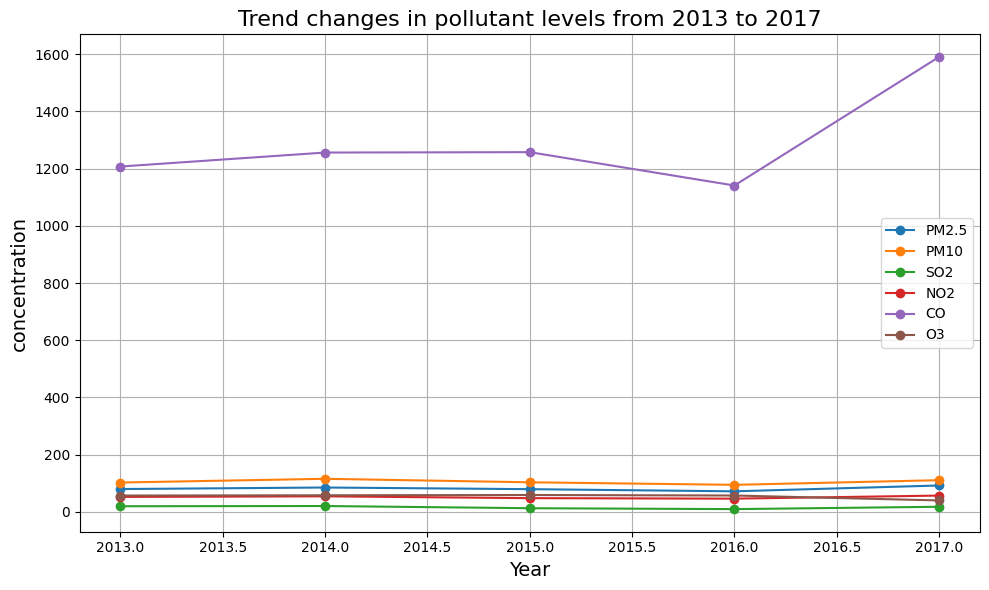

In [61]:
# Plot Trends dari tahun ke tahun
plt.figure(figsize=(10, 6))

# Plot untuk setiap kolom polutan
for column in air_pollutant_year.columns:
    plt.plot(air_pollutant_year.index, air_pollutant_year[column], label=column, marker='o')

plt.title('Trend changes in pollutant levels from 2013 to 2017', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('concentration', fontsize=14)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Persentase Perubahan 2013 ke 2017
pollutant_chang = ((air_pollutant_year.loc[2017] - air_pollutant_year.loc[2013]) / air_pollutant_year.loc[2013]) * 100
pollutant_chang_round= round(pollutant_chang, 2)
print("\nPersentase perubahan 2013 ke 2017:")
print(pollutant_chang_round)


Persentase perubahan 2013 ke 2017:
PM2.5    15.54
PM10      7.97
SO2      -9.35
NO2       9.03
CO       31.73
O3      -29.89
dtype: float64


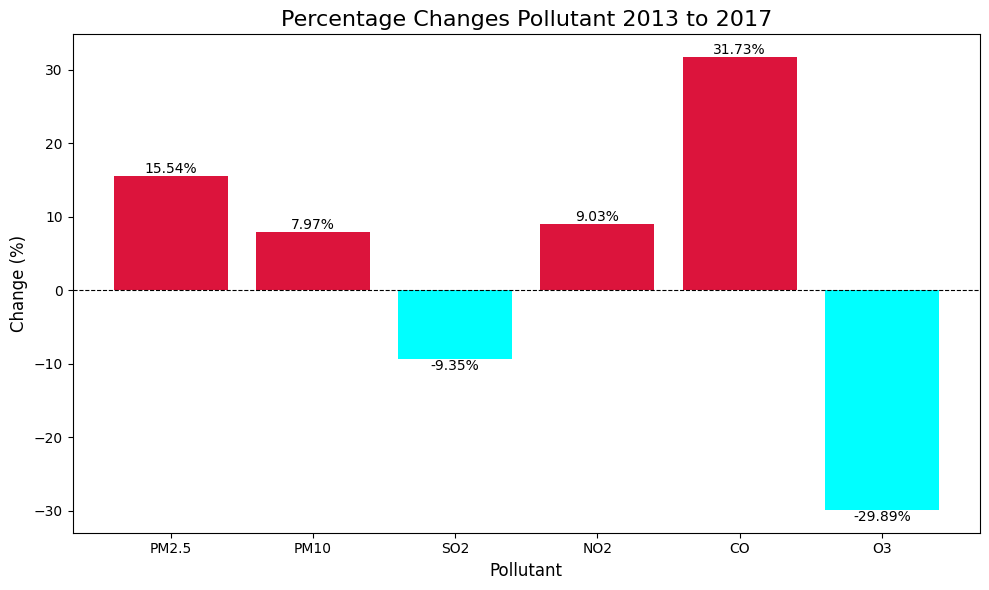

In [64]:
pollutant_chang = {"PM2.5": 15.54, "PM10": 7.97, "SO2": -9.35,"NO2": 9.03, "CO": 31.73, "O3": -29.89}

polutans = list(pollutant_chang.keys())
changes = list(pollutant_chang.values())

colors = ['crimson' if change > 0 else 'cyan' for change in changes]
plt.figure(figsize=(10, 6))
plt.bar(polutans, changes, color=colors)

plt.title('Percentage Changes Pollutant 2013 to 2017', fontsize=16)
plt.xlabel('Pollutant', fontsize=12)
plt.ylabel('Change (%)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Garis nol
for i, change in enumerate(changes):
    plt.text(i, change, f'{change}%', ha='center', va='bottom' if change > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

<b><font size="5">2. Bagaimana trend perkembangan kualitas setiap polutan tiap tahunnya ?</font><b>

In [55]:
# Persentase Perubahan Tiap Tahunnya
pollutant_change_yearly = air_pollutant_year.pct_change() * 100
pollutant_change_yearly = pollutant_change_yearly.round(2)

pollutant_change_yearly.fillna(0, inplace=True)
print(f"Persentse perkembangan setiap tahunnya:\n{pollutant_change_yearly}")

Persentse perkembangan setiap tahunnya:
      PM2.5   PM10    SO2    NO2     CO     O3
year                                          
2013   0.00   0.00   0.00   0.00   0.00   0.00
2014   6.72  12.67   3.66   3.98   4.05   1.64
2015  -6.78 -10.57 -36.93 -11.61   0.11   1.60
2016  -9.46  -8.54 -24.11  -3.63  -9.27  -2.96
2017  28.26  17.15  82.69  23.10  39.39 -30.04


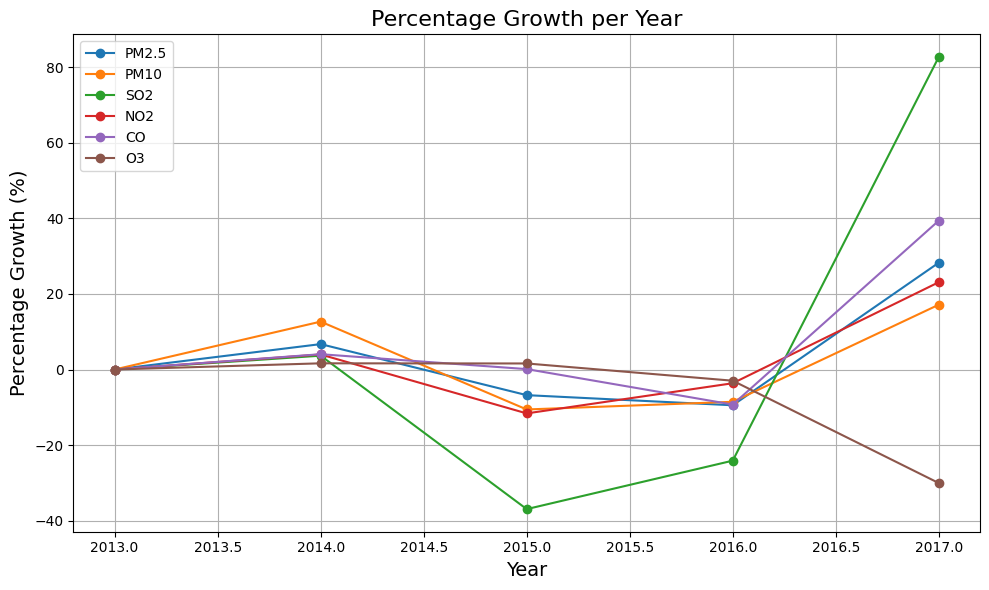

In [56]:
# Plot Perkembangan Trends Pada Tiap Polusi dari tahun ke tahun
plt.figure(figsize=(10, 6))

for column in pollutant_change_yearly.columns:
    plt.plot(pollutant_change_yearly.index, pollutant_change_yearly[column], label=column, marker='o')

plt.title('Percentage Growth per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Growth (%)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<b><font size="5">3. Apa stasiun dengan tingkat polutan tertinggi dan terendah ?</font><b>

In [57]:
avg_pollutants = combine_df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

highest_pollutants = avg_pollutants.idxmax()
lowest_pollutants = avg_pollutants.idxmin()
print("Highest Levels:", highest_pollutants)
print("Lowest Levels:", lowest_pollutants)

Highest Levels: PM2.5           Dongsi
PM10           Gucheng
SO2       Nongzhanguan
NO2             Wanliu
CO       Wanshouxigong
O3            Dingling
dtype: object
Lowest Levels: PM2.5    Dingling
PM10     Dingling
SO2      Dingling
NO2      Dingling
CO       Dingling
O3         Wanliu
dtype: object


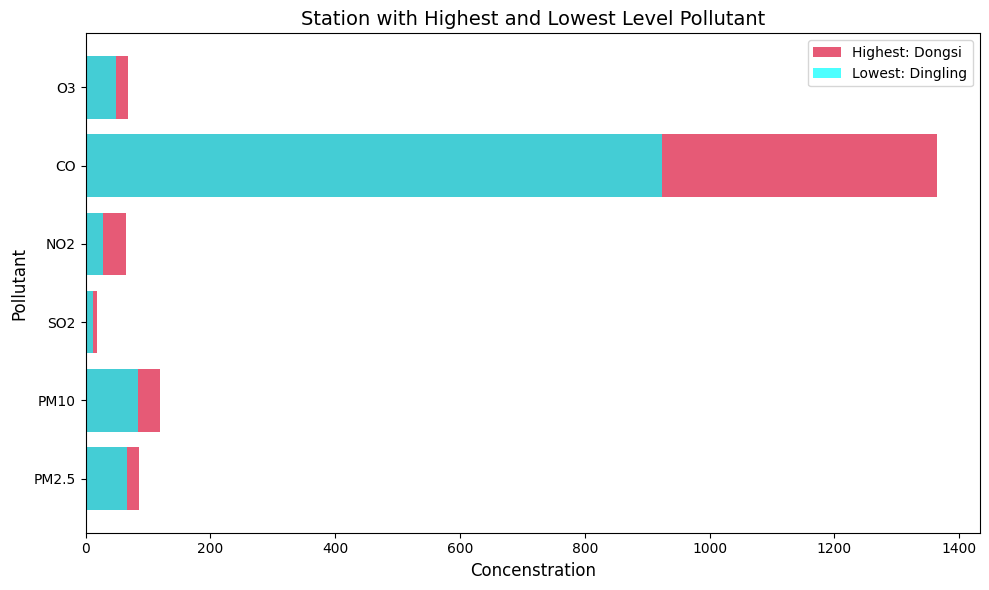

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))

# Anotasi pada setiap polutan dengan tingkat tertinggi dan terendah
for pollutant in avg_pollutants.columns:
    highest_station = highest_pollutants[pollutant]
    lowest_station = lowest_pollutants[pollutant]
    highest_value = avg_pollutants.loc[highest_station, pollutant]
    lowest_value = avg_pollutants.loc[lowest_station, pollutant]
    
# Plot bar untuk nilai tertinggi dan terendah
    ax.barh(pollutant, highest_value, color='crimson', alpha=0.7, label=f"Highest: {highest_station}" 
            if pollutant == avg_pollutants.columns[0] else "")
    ax.barh(pollutant, lowest_value, color='cyan', alpha=0.7, label=f"Lowest: {lowest_station}" 
            if pollutant == avg_pollutants.columns[0] else "")


ax.set_title("Station with Highest and Lowest Level Pollutant", fontsize=14)
ax.set_xlabel("Concenstration", fontsize=12)
ax.set_ylabel("Pollutant", fontsize=12)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

<b><font size="5">4. Bagaimana korelasi tingkat polusi dengan cuaca ?</font><b>

In [59]:
corr_matrix = combine_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'RAIN', 'WSPM']].corr()
print(corr_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.879389  0.477582  0.658108  0.768664 -0.147204 -0.129715   
PM10   0.879389  1.000000  0.458519  0.645448  0.686716 -0.109983 -0.095395   
SO2    0.477582  0.458519  1.000000  0.491109  0.524707 -0.162283 -0.318067   
NO2    0.658108  0.645448  0.491109  1.000000  0.688207 -0.463523 -0.273864   
CO     0.768664  0.686716  0.524707  0.688207  1.000000 -0.305255 -0.317872   
O3    -0.147204 -0.109983 -0.162283 -0.463523 -0.305255  1.000000  0.585303   
TEMP  -0.129715 -0.095395 -0.318067 -0.273864 -0.317872  0.585303  1.000000   
PRES   0.018357 -0.017806  0.220414  0.171262  0.183004 -0.438657 -0.813300   
RAIN  -0.014156 -0.026360 -0.040029 -0.043357 -0.013008  0.023146  0.037635   
WSPM  -0.269023 -0.181835 -0.107549 -0.393849 -0.290044  0.291641  0.033029   

           PRES      RAIN      WSPM  
PM2.5  0.018357 -0.014156 -0.269023  
PM10  -0.017806 -0.026360 -0.181835  
SO2    0.220414 

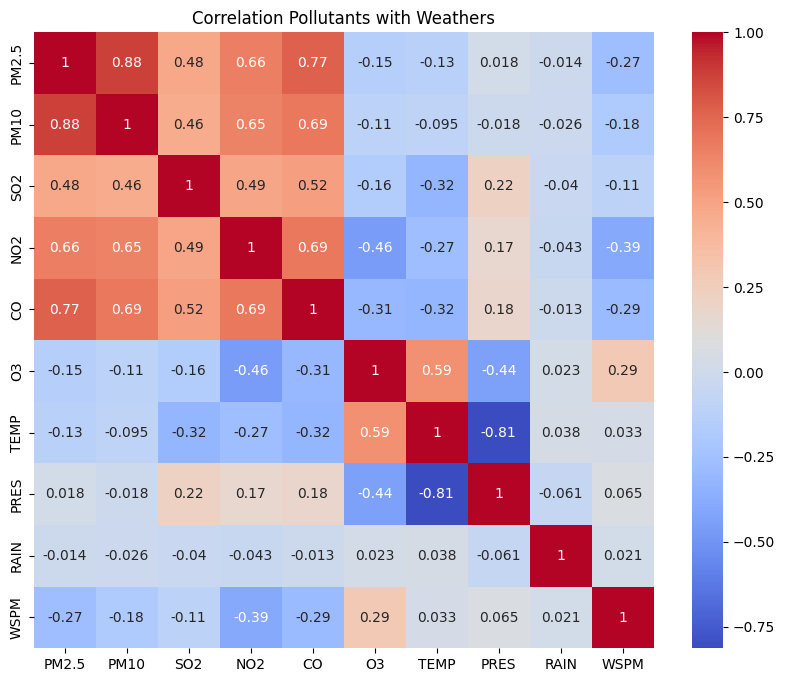

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Pollutants with Weathers')
plt.show()

<b><font size="5">Conclusion</font><b>

1. Bagaimana trend perubahan polutan dari 2013 hingga 2017 ?
- Berdasarkan analisis data, Perkembangan trend kualitas polusi 'PM2.5' 'PM10', 'NO2', 'CO' dari tahun 2013 ke 2017 mengalami kenaikan sedangkan 'SO3', 'O3' mengalami penurunan.berikut kenaikan secara berurutan :
    - CO3 mengalami kenaikan sebanyak 31.73 %
    - PM2.5 mengalami kenaikan sebanyak 15.54 %
    - NO2 mengalami kenaikan sebanyak 9.03 %
    - PM10 mengalami kenaikan sebanyak  7.97 %
    - SO2 mengalami penurunan sebanyak -9.35 %
    - O3 mengalami penurunan sebanyak -29.89 %
2. Bagaimana trend perkembangan kualitas setiap polutan tiap tahunnya ?
-  Berdasarkan analisis data perkembangan tiap tahun :
    - 2014 merupakan titik awal kenaikan persentase pada setiap polutan. Pada tahun ini semuanya mengalami kenaikan dimana peningkatan terbesar terjadi pada PM10 (12,67%) dan PM2.5 (6.72%)
    - 2015 mengalami penurunan signifikan pada sebagian besar polutan terkecuali pada CO mengalami peningkatan sedikit sebanyak CO(0.11%)   03(1.60%)
    - 2016 penurunan sebagian besar polutan terus berlanjut, namun tidak separah tahun 2015
    - 2017 merupakan tahun dengan peningkatan polutan yang sangat signifikan.
3. Apa stasiun dengan tingkat pollutan tertinggi dan terendah ?
- Berdasarkan analisis data, stasiun dengan pollutant tertinggi adalah Dongsi dan stasiun dengan polutan terendah merupakan Dingling
4. Bagaimana korelasi tingkat polusi dengan cuaca ?
- Pada analisis data :
   - Suhu memiliki korelasi negatif dengan sebagian besar polutan lainnya dan korealsi positif yang kuat pada 03.
   - Tekanan memiliki korelasi positif yang lemah dengan sebagian besar polutan dan korelasi negatif kuat pada 03.
   - Hujan memiliki korelasi negatif yang lemah dengan sebagian besar polutan.
   - Kecepatan angin memiliki korelasi negatif pada sebagian besar polutan dan korelasi positif yang cukup pada 03.
    Tingkat korelasi variabel polusi dengan cuaca pada suhu, angin memiliki pengaruh atas kenaikan konsetrasi pada polutan sedangkan pada tekanan dan hujan memiliki konsetrasi yang lebih lemah.
  